In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import joblib
import warnings;warnings.simplefilter('ignore')
from tqdm import tqdm_notebook as tqdm
root = '../data/phase_2/raw/PROII20200310/'
excel_list = os.listdir(root)[2:-1]
excel_list

['Aroma-1_Unit_000_Simulation_Results_Rerun_001_050_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_051_100_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_101_150_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_151_200_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_201_250_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_251_300_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_301_350_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_351_400_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_401_450_Yu Final.xlsx']

In [2]:
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

In [3]:
def parse_sheet_name(file_name):
    start,end = int(file_name.split('_')[-3]),int(file_name.split('_')[-2])
    return [str(i).zfill(3) for i in range(start,end+1)]

# clean_data

In [4]:
def clean_data(df):
    df = df.T.reset_index()
    idx = df.iloc[5:,1].values
    df = df.iloc[:,9:-6]
    prefix = pd.Series(df.iloc[1,:].values).fillna(method='ffill').values
    middle = df.iloc[2,:].values
    suffix = df.iloc[3,:].values
    col = [p.strip() + '_' + m.strip() + '_' + s.strip() for p,m,s in zip(prefix,middle,suffix)]
    df = df.iloc[5:,:]
    df.index = idx
    df.columns = col
    return df.astype('float')

In [5]:
temp = clean_data(pd.read_excel(root+excel_list[0],sheet_name='001'))
print(temp.shape,temp.isnull().sum().sum())
temp.head()

(33, 274) 0


,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_C7+ in Light End (Input)_wt%,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Case Conditions_C6P- in Heart Cut (Input)_wt%,Case Conditions_Feed Rate to C013 (Results)_m3/hr,Case Conditions_C7+ in Light End (Results)_wt%,Case Conditions_Heart Cut Prod. Rate (Results)_m3/hr,Case Conditions_C6P- in Heart Cut (Results)_wt%,Case Conditions_C10+ in Heart Cut (Results)_wt%,Naphtha Properties_Naphtha Feed Rate_m3/hr,Naphtha Properties_Naphtha Feed Rate_ton/hr,Naphtha Properties_N+A in Naphtha_wt%,Naphtha Properties_C6P- in Naphtha_wt%,Naphtha Properties_C10+ in Naphtha_wt%,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,Naphtha Properties_tr2-Hexene_wt%,Naphtha Properties_n-Hexane_wt%,Naphtha Properties_Methylcyclopentane_wt%,"Naphtha Properties_2,2-Dimethylpentane_wt%",Naphtha Properties_Benzene_wt%,Naphtha Properties_Cyclohexane_wt%,"Naphtha Properties_2,2,3-Trimethylbutane_wt%",Naphtha Properties_4-Methyl-1-hexene_wt%,Naphtha Properties_2-Methylhexane_wt%,"Naphtha Properties_t-1,3-Dimethylcyclopentane_wt%",Naphtha Properties_n-Heptane_wt%,Naphtha Properties_H2O_wt%,Naphtha Properties_Methylcyclohexane_wt%,Naphtha Properties_Ethylcyclopentane_wt%,"Naphtha Properties_2,3-Dimethyl-1-hexene_wt%",Naphtha Properties_Toluene_wt%,Naphtha Properties_2-Methylheptane_wt%,Naphtha Properties_n-Octane_wt%,Naphtha Properties_Ethylcyclohexane_wt%,Naphtha Properties_EthylBenzene_wt%,Naphtha Properties_P-Xylene_wt%,Naphtha Properties_M-Xylene_wt%,Naphtha Properties_O-Xylene_wt%,Naphtha Properties_2-Methyloctane_wt%,Naphtha Properties_1-Nonene_wt%,Naphtha Properties_n-Nonane_wt%,Naphtha Properties_i-Propylbenzene_wt%,"Naphtha Properties_1-trans-3,5-Trimethylcyclohexane_wt%",Naphtha Properties_n-Propylcyclohexane_wt%,Naphtha Properties_n-Propylbenzene_wt%,"Naphtha Properties_1,3,5-Trimethylbenzene_wt%",Naphtha Properties_1-Methyl-2-ethylbenzene_wt%,"Naphtha Properties_1,2,3-Trimethylbenzene_wt%","Naphtha Properties_2,4-Dimethyloctane_wt%","Naphtha Properties_2,2,3,3-Tetramethylhexane_wt%",Naphtha Properties_3-Methylnonane_wt%,Naphtha Properties_tert-Butylcyclohexane_wt%,Naphtha Properties_n-Decane_wt%,"Naphtha Properties_1,2-Diethylbenzene_wt%",Naphtha Properties_n-Undecane_wt%,Naphtha Properties_n-Pentylbenzene_wt%,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%,Naphtha Properties_Overall_wt%,Feed_Naphtha Temp after E062_oC,Feed_Naphtha Feed Rate to C011_m3/hr,Feed_Naphtha Feed Rate to C013_m3/hr,Specifications_Spec 1 : C7+ in Light End_wt%,Specifications_Spec 2 : Heart Cut Prod. Rate_m3/hr,Specifications_Spec 3 : C6P- in Heart Cut_wt%,Operating Pressure_V012_kg/cm2_g,Operating Pressure_C011 Ovhd_kg/cm2_g,Operating Pressure_C011 Btm_kg/cm2_g,Operating Pressure_C013 Ovhd_kg/cm2_g,Operating Pressure_C013 Btm_kg/cm2_g,Yield Summary_Reflux Rate_m3/hr,Yield Summary_Light End Prod. Rate_m3/hr,Yield Summary_Heart Cut Prod. Rate_m3/hr,Yield Summary_Heavy End Prod. Rate_m3/hr,Column Temp Profile_V012 Operating Temp_oC,Column Temp Profile_C011 Ovhd Temp_oC,Column Temp Profile_C011 Tray 5 Temp_oC,Column Temp Profile_C011 Tray 15 Temp_oC,Column Temp Profile_C011 Tray 24 Temp_oC,Column Temp Profile_C011 Btm Temp_oC,Column Temp Profile_C013 Ovhd Temp_oC,Column Temp Profile_C013 Tray 5 Temp_oC,Column Temp Profile_C013 Tray 12 Temp_oC,Column Temp Profile_C013 Tray 16 Temp_oC,Column Temp Profile_C013 Tray 31 Temp_oC,Column Temp Profile_C013 Tray Btm Temp_oC,Duty_E062 3.5K Steam Rate_ton/hr,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr,Light End Product Properties_Light End Prod. Rate_m3/hr,Light End Product Properties_Light End Prod. Rate_ton/hr

# for loop load all data

In [6]:
train = pd.DataFrame(columns=temp.columns)
for file_name in tqdm(excel_list):
    data = pd.read_excel(root+file_name,sheet_name = None)
    sheet_names = parse_sheet_name(file_name)
    for i in sheet_names:
        rows = clean_data(data.get(i))
        rows.columns = train.columns
        train = train.append(rows)

# check

In [7]:
print(train.shape)
train.head()

(14876, 274)


,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_C7+ in Light End (Input)_wt%,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Case Conditions_C6P- in Heart Cut (Input)_wt%,Case Conditions_Feed Rate to C013 (Results)_m3/hr,Case Conditions_C7+ in Light End (Results)_wt%,Case Conditions_Heart Cut Prod. Rate (Results)_m3/hr,Case Conditions_C6P- in Heart Cut (Results)_wt%,Case Conditions_C10+ in Heart Cut (Results)_wt%,Naphtha Properties_Naphtha Feed Rate_m3/hr,Naphtha Properties_Naphtha Feed Rate_ton/hr,Naphtha Properties_N+A in Naphtha_wt%,Naphtha Properties_C6P- in Naphtha_wt%,Naphtha Properties_C10+ in Naphtha_wt%,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,Naphtha Properties_tr2-Hexene_wt%,Naphtha Properties_n-Hexane_wt%,Naphtha Properties_Methylcyclopentane_wt%,"Naphtha Properties_2,2-Dimethylpentane_wt%",Naphtha Properties_Benzene_wt%,Naphtha Properties_Cyclohexane_wt%,"Naphtha Properties_2,2,3-Trimethylbutane_wt%",Naphtha Properties_4-Methyl-1-hexene_wt%,Naphtha Properties_2-Methylhexane_wt%,"Naphtha Properties_t-1,3-Dimethylcyclopentane_wt%",Naphtha Properties_n-Heptane_wt%,Naphtha Properties_H2O_wt%,Naphtha Properties_Methylcyclohexane_wt%,Naphtha Properties_Ethylcyclopentane_wt%,"Naphtha Properties_2,3-Dimethyl-1-hexene_wt%",Naphtha Properties_Toluene_wt%,Naphtha Properties_2-Methylheptane_wt%,Naphtha Properties_n-Octane_wt%,Naphtha Properties_Ethylcyclohexane_wt%,Naphtha Properties_EthylBenzene_wt%,Naphtha Properties_P-Xylene_wt%,Naphtha Properties_M-Xylene_wt%,Naphtha Properties_O-Xylene_wt%,Naphtha Properties_2-Methyloctane_wt%,Naphtha Properties_1-Nonene_wt%,Naphtha Properties_n-Nonane_wt%,Naphtha Properties_i-Propylbenzene_wt%,"Naphtha Properties_1-trans-3,5-Trimethylcyclohexane_wt%",Naphtha Properties_n-Propylcyclohexane_wt%,Naphtha Properties_n-Propylbenzene_wt%,"Naphtha Properties_1,3,5-Trimethylbenzene_wt%",Naphtha Properties_1-Methyl-2-ethylbenzene_wt%,"Naphtha Properties_1,2,3-Trimethylbenzene_wt%","Naphtha Properties_2,4-Dimethyloctane_wt%","Naphtha Properties_2,2,3,3-Tetramethylhexane_wt%",Naphtha Properties_3-Methylnonane_wt%,Naphtha Properties_tert-Butylcyclohexane_wt%,Naphtha Properties_n-Decane_wt%,"Naphtha Properties_1,2-Diethylbenzene_wt%",Naphtha Properties_n-Undecane_wt%,Naphtha Properties_n-Pentylbenzene_wt%,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%,Naphtha Properties_Overall_wt%,Feed_Naphtha Temp after E062_oC,Feed_Naphtha Feed Rate to C011_m3/hr,Feed_Naphtha Feed Rate to C013_m3/hr,Specifications_Spec 1 : C7+ in Light End_wt%,Specifications_Spec 2 : Heart Cut Prod. Rate_m3/hr,Specifications_Spec 3 : C6P- in Heart Cut_wt%,Operating Pressure_V012_kg/cm2_g,Operating Pressure_C011 Ovhd_kg/cm2_g,Operating Pressure_C011 Btm_kg/cm2_g,Operating Pressure_C013 Ovhd_kg/cm2_g,Operating Pressure_C013 Btm_kg/cm2_g,Yield Summary_Reflux Rate_m3/hr,Yield Summary_Light End Prod. Rate_m3/hr,Yield Summary_Heart Cut Prod. Rate_m3/hr,Yield Summary_Heavy End Prod. Rate_m3/hr,Column Temp Profile_V012 Operating Temp_oC,Column Temp Profile_C011 Ovhd Temp_oC,Column Temp Profile_C011 Tray 5 Temp_oC,Column Temp Profile_C011 Tray 15 Temp_oC,Column Temp Profile_C011 Tray 24 Temp_oC,Column Temp Profile_C011 Btm Temp_oC,Column Temp Profile_C013 Ovhd Temp_oC,Column Temp Profile_C013 Tray 5 Temp_oC,Column Temp Profile_C013 Tray 12 Temp_oC,Column Temp Profile_C013 Tray 16 Temp_oC,Column Temp Profile_C013 Tray 31 Temp_oC,Column Temp Profile_C013 Tray Btm Temp_oC,Duty_E062 3.5K Steam Rate_ton/hr,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr,Light End Product Properties_Light End Prod. Rate_m3/hr,Light End Product Properties_Light End Prod. Rate_ton/hr

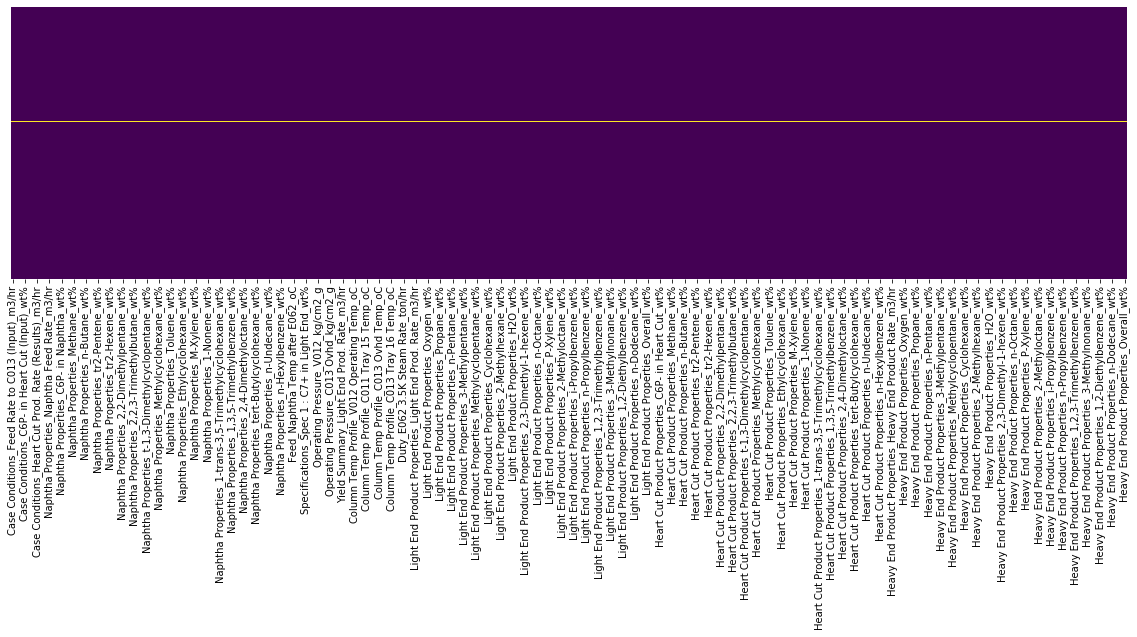

In [8]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
print(train.shape)
train = train.dropna(axis=0)
train.shape

(14876, 274)


(14848, 274)

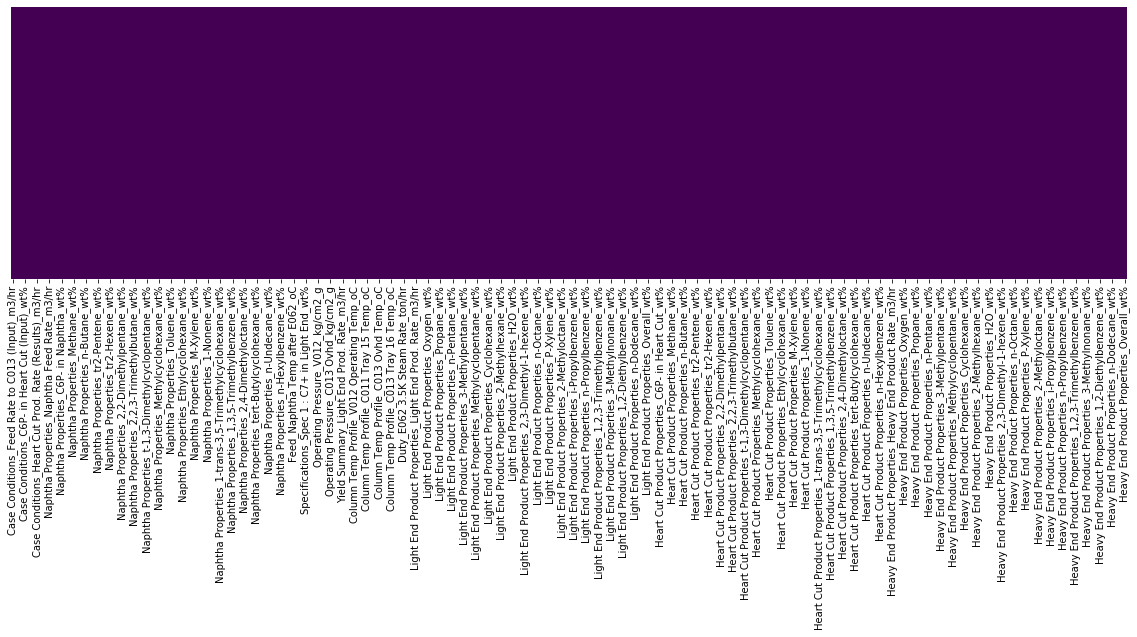

In [10]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# build col_names object

In [11]:
xna = get_col(train,'Naphtha Properties')[-1-54:-1]
xle = get_col(train,'Light End Product Properties')[-1-54:-1]
xhc = get_col(train,'Heart Cut Product Properties')[-1-54:-1]
xhe = get_col(train,'Heavy End Product Properties')[-1-54:-1]

In [12]:
fna = ['Naphtha Properties_Naphtha Feed Rate_ton/hr']
fle = ['Light End Product Properties_Light End Prod. Rate_ton/hr']
fhc = ['Heart Cut Product Properties_Heart Cut Prod. Rate_ton/hr']
fhe = ['Heavy End Product Properties_Heavy End Product Rate_ton/hr']

In [13]:
col_names = {}
col_names['xna'] = xna
col_names['xle'] = xle
col_names['xhc'] = xhc
col_names['xhe'] = xhe
col_names['fna'] = fna
col_names['fle'] = fle
col_names['fhc'] = fhc
col_names['fhe'] = fhe

# check col_names object

In [14]:
cols = []
for i in col_names.values():
    cols = cols + i
train[cols].head()

,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,Naphtha Properties_tr2-Hexene_wt%,Naphtha Properties_n-Hexane_wt%,Naphtha Properties_Methylcyclopentane_wt%,"Naphtha Properties_2,2-Dimethylpentane_wt%",Naphtha Properties_Benzene_wt%,Naphtha Properties_Cyclohexane_wt%,"Naphtha Properties_2,2,3-Trimethylbutane_wt%",Naphtha Properties_4-Methyl-1-hexene_wt%,Naphtha Properties_2-Methylhexane_wt%,"Naphtha Properties_t-1,3-Dimethylcyclopentane_wt%",Naphtha Properties_n-Heptane_wt%,Naphtha Properties_H2O_wt%,Naphtha Properties_Methylcyclohexane_wt%,Naphtha Properties_Ethylcyclopentane_wt%,"Naphtha Properties_2,3-Dimethyl-1-hexene_wt%",Naphtha Properties_Toluene_wt%,Naphtha Properties_2-Methylheptane_wt%,Naphtha Properties_n-Octane_wt%,Naphtha Properties_Ethylcyclohexane_wt%,Naphtha Properties_EthylBenzene_wt%,Naphtha Properties_P-Xylene_wt%,Naphtha Properties_M-Xylene_wt%,Naphtha Properties_O-Xylene_wt%,Naphtha Properties_2-Methyloctane_wt%,Naphtha Properties_1-Nonene_wt%,Naphtha Properties_n-Nonane_wt%,Naphtha Properties_i-Propylbenzene_wt%,"Naphtha Properties_1-trans-3,5-Trimethylcyclohexane_wt%",Naphtha Properties_n-Propylcyclohexane_wt%,Naphtha Properties_n-Propylbenzene_wt%,"Naphtha Properties_1,3,5-Trimethylbenzene_wt%",Naphtha Properties_1-Methyl-2-ethylbenzene_wt%,"Naphtha Properties_1,2,3-Trimethylbenzene_wt%","Naphtha Properties_2,4-Dimethyloctane_wt%","Naphtha Properties_2,2,3,3-Tetramethylhexane_wt%",Naphtha Properties_3-Methylnonane_wt%,Naphtha Properties_tert-Butylcyclohexane_wt%,Naphtha Properties_n-Decane_wt%,"Naphtha Properties_1,2-Diethylbenzene_wt%",Naphtha Properties_n-Undecane_wt%,Naphtha Properties_n-Pentylbenzene_wt%,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%,Light End Product Properties_Oxygen_wt%,Light End Product Properties_Methane_wt%,Light End Product Properties_Ethane_wt%,Light End Product Properties_Propane_wt%,Light End Product Properties_n-Butane_wt%,Light End Product Properties_i-Pentane_wt%,Light End Product Properties_n-Pentane_wt%,Light End Product Properties_tr2-Pentene_wt%,Light End Product Properties_Cyclopentane_wt%,Light End Product Properties_3-Methylpentane_wt%,Light End Product Properties_tr2-Hexene_wt%,Light End Product Properties_n-Hexane_wt%,Light End Product Properties_Methylcyclopentane_wt%,"Light End Product Properties_2,2-Dimethylpentane_wt%",Light End Product Properties_Benzene_wt%,Light End Product Properties_Cyclohexane_wt%,"Light End Product Properties_2,2,3-Trimethylbutane_wt%",Light End Product Properties_4-Methyl-1-hexene_wt%,Light End Product Properties_2-Methylhexane_wt%,"Light End Product Properties_t-1,3-Dimethylcyclopentane_wt%",Light End Product Properties_n-Heptane_wt%,Light End Product Properties_H2O_wt%,Light End Product Properties_Methylcyclohexane_wt%,Light End Product Properties_Ethylcyclopentane_wt%,"Light End Product Properties_2,3-Dimethyl-1-hexene_wt%",Light End Product Properties_Toluene_wt%,Light End Product Properties_2-Methylheptane_wt%,Light End Product Properties_n-Octane_wt%,Light End Product Properties_Ethylcyclohexane_wt%,Light End Product Properties_EthylBenzene_wt%,Light End Product Properties_P-Xylene_wt%,Light End Product Properties_M-Xylene_wt%,Light End Product Properties_O-Xylene_wt%,Light End Product Properties_2-Methyloctane_wt%,Light End Product Properties_1-Nonene_wt%,Light End Product Properties_n-Nonane_wt%,Light End Product Properties_i-Propylbenzene_wt%,"Light End Product Properties_1-trans-3,5-Trimethylcyclohexane_wt%",Light End Product Properties_n-Propylcyclohexane_wt%,Light End Product Properties_n-Propylbenzene_wt%,"Light End Product Properties_1,3,5-Trimethylbenzene_wt%",Light End Product Prop

# add split factor

In [15]:
n = [ i.split('_')[1] for i in xna]
col_names['sle'] = ['Individual Component to Light End Split Factor_{}_Ratio'.format(i) for i in n]
col_names['shc'] = ['Individual Component to Heart Cut Split Factor_{}_Ratio'.format(i) for i in n]
col_names['she'] = ['Individual Component to Heavy End Split Factor_{}_Ratio'.format(i) for i in n]

In [16]:
xna = train[col_names['xna']].values
fna = train[col_names['fna']].values

xle = train[col_names['xle']].values
fle = train[col_names['fle']].values

xhc = train[col_names['xhc']].values
fhc = train[col_names['fhc']].values

xhe = train[col_names['xhe']].values
fhe = train[col_names['fhe']].values

In [17]:
sle = (xle*fle)/(xna*fna)
sle = pd.DataFrame(sle,columns=col_names['sle'])
sle = sle.fillna(1)
sle.iloc[:,-1] = 0

In [18]:
shc = (xhc*fhc)/(xna*fna)
shc = pd.DataFrame(shc,columns=col_names['shc'])
shc = shc.fillna(0)

In [19]:
she = (xhe*fhe)/(xna*fna)
she = pd.DataFrame(she,columns=col_names['she'])
she = she.fillna(0)
she.iloc[:,-1] = 1

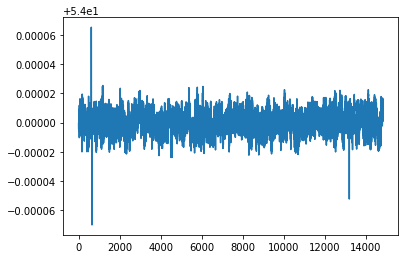

In [20]:
plt.plot(np.sum(sle.values+shc.values+she.values,axis=1))

# add case_col

In [21]:
col_names['case'] = list(set(get_col(train,'Case'))&set(get_col(train,'Input')))

# save

In [22]:
cols = []
for i in ['case','xna','xle','xhc','xhe','fna','fle','fhc','fhe','sle','shc','she']:
    cols = cols + col_names[i]

In [23]:
temp = np.hstack((train.values,sle.values,shc.values,she.values))
idx = train.index
train = pd.DataFrame(temp,columns=train.columns.tolist()+col_names['sle']+col_names['shc']+col_names['she'],index=idx)
print(train.shape)

(14848, 436)


In [24]:
train = train[cols]
train.shape

(14848, 386)

In [25]:
train.head()

,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Case Conditions_C7+ in Light End (Input)_wt%,Case Conditions_C6P- in Heart Cut (Input)_wt%,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,Naphtha Properties_tr2-Hexene_wt%,Naphtha Properties_n-Hexane_wt%,Naphtha Properties_Methylcyclopentane_wt%,"Naphtha Properties_2,2-Dimethylpentane_wt%",Naphtha Properties_Benzene_wt%,Naphtha Properties_Cyclohexane_wt%,"Naphtha Properties_2,2,3-Trimethylbutane_wt%",Naphtha Properties_4-Methyl-1-hexene_wt%,Naphtha Properties_2-Methylhexane_wt%,"Naphtha Properties_t-1,3-Dimethylcyclopentane_wt%",Naphtha Properties_n-Heptane_wt%,Naphtha Properties_H2O_wt%,Naphtha Properties_Methylcyclohexane_wt%,Naphtha Properties_Ethylcyclopentane_wt%,"Naphtha Properties_2,3-Dimethyl-1-hexene_wt%",Naphtha Properties_Toluene_wt%,Naphtha Properties_2-Methylheptane_wt%,Naphtha Properties_n-Octane_wt%,Naphtha Properties_Ethylcyclohexane_wt%,Naphtha Properties_EthylBenzene_wt%,Naphtha Properties_P-Xylene_wt%,Naphtha Properties_M-Xylene_wt%,Naphtha Properties_O-Xylene_wt%,Naphtha Properties_2-Methyloctane_wt%,Naphtha Properties_1-Nonene_wt%,Naphtha Properties_n-Nonane_wt%,Naphtha Properties_i-Propylbenzene_wt%,"Naphtha Properties_1-trans-3,5-Trimethylcyclohexane_wt%",Naphtha Properties_n-Propylcyclohexane_wt%,Naphtha Properties_n-Propylbenzene_wt%,"Naphtha Properties_1,3,5-Trimethylbenzene_wt%",Naphtha Properties_1-Methyl-2-ethylbenzene_wt%,"Naphtha Properties_1,2,3-Trimethylbenzene_wt%","Naphtha Properties_2,4-Dimethyloctane_wt%","Naphtha Properties_2,2,3,3-Tetramethylhexane_wt%",Naphtha Properties_3-Methylnonane_wt%,Naphtha Properties_tert-Butylcyclohexane_wt%,Naphtha Properties_n-Decane_wt%,"Naphtha Properties_1,2-Diethylbenzene_wt%",Naphtha Properties_n-Undecane_wt%,Naphtha Properties_n-Pentylbenzene_wt%,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%,Light End Product Properties_Oxygen_wt%,Light End Product Properties_Methane_wt%,Light End Product Properties_Ethane_wt%,Light End Product Properties_Propane_wt%,Light End Product Properties_n-Butane_wt%,Light End Product Properties_i-Pentane_wt%,Light End Product Properties_n-Pentane_wt%,Light End Product Properties_tr2-Pentene_wt%,Light End Product Properties_Cyclopentane_wt%,Light End Product Properties_3-Methylpentane_wt%,Light End Product Properties_tr2-Hexene_wt%,Light End Product Properties_n-Hexane_wt%,Light End Product Properties_Methylcyclopentane_wt%,"Light End Product Properties_2,2-Dimethylpentane_wt%",Light End Product Properties_Benzene_wt%,Light End Product Properties_Cyclohexane_wt%,"Light End Product Properties_2,2,3-Trimethylbutane_wt%",Light End Product Properties_4-Methyl-1-hexene_wt%,Light End Product Properties_2-Methylhexane_wt%,"Light End Product Properties_t-1,3-Dimethylcyclopentane_wt%",Light End Product Properties_n-Heptane_wt%,Light End Product Properties_H2O_wt%,Light End Product Properties_Methylcyclohexane_wt%,Light End Product Properties_Ethylcyclopentane_wt%,"Light End Product Properties_2,3-Dimethyl-1-hexene_wt%",Light End Product Properties_Toluene_wt%,Light End Product Properties_2-Methylheptane_wt%,Light End Product Properties_n-Octane_wt%,Light End Product Properties_Ethylcyclohexane_wt%,Light End Product Properties_EthylBenzene_wt%,Light End Product Properties_P-Xylene_wt%,Light End Product Properties_M-Xylene_wt%,Light End Product Properties_O-Xylene_wt%,Light End Product Properties_2-Methyloctane_wt%,Light End Product Properties_1-Nonene_wt%,Light End Product Properties_n-Nonane_wt%,Light End Product Properties_i-Propylbenzene_wt%,"Light End Product Properties_1-trans-3,5-Trimethylcyclohexa

In [26]:
train.to_csv('../data/phase_2/cleaned/train.csv')
joblib.dump(col_names,'../data/phase_2/cleaned/col_names.pkl')

['../data/phase_2/cleaned/col_names.pkl']